# Artificial Neural Networks - 3rd Assignment - Armin Abbasi Najarzadeh

# Part 1 (Autoencoders)

## a) Explain what problems sampling from the 𝑞(𝑧|𝑥) distribution leads to in Variational- Autoencoders, explain how the sampling process can be rewritten to solve the problems, and give an explanation of how this trick works.

In Variational Autoencoders (VAEs), the goal is to learn a latent variable model for the data, and this is done by maximizing the Evidence Lower BOund (ELBO) on the log-likelihood of the data. The ELBO involves an expectation over the approximate posterior q(z|x), which is intractable to compute exactly. Therefore, we resort to Monte Carlo estimation, which involves sampling from q(z|x). 

However, this sampling operation is non-differentiable, which poses a problem because we want to optimize the parameters of our model (including the parameters of q(z|x)) using gradient-based optimization methods like stochastic gradient descent. This is where ***the reparameterization trick*** comes in.

The reparameterization trick is a method to rewrite the sampling operation in a differentiable manner. Instead of directly sampling z from q(z|x), we sample an auxiliary random variable ε from a simple distribution (like a standard normal distribution), and then transform ε using a deterministic function g such that z = g(ε,x). The function g is chosen such that the distribution of z is the same as q(z|x). 

For example, if q(z|x) is a Gaussian distribution with mean μ(x) and standard deviation σ(x) (both functions of x), then we can choose g(ε,x)= μ(x)+ σ(x)  .  ε. 

This way, the randomness is isolated to the ε variable, and the transformation g is fully deterministic and differentiable with respect to its inputs. Therefore, we can backpropagate gradients through the sampling operation, which allows us to optimize the parameters of q(z|x) using gradient-based optimization methods. This is the essence of the reparameterization trick. 

## b) How can you use a VAE to measure the degree of imbalance in a dataset? What are the advantages and disadvantages of this method compared to other techniques?

A Variational Autoencoder (VAE) can be used to measure the degree of imbalance in a dataset by examining the latent space that the VAE learns. In a balanced dataset, the distribution of data points in the latent space should be relatively uniform. However, in an imbalanced dataset, certain regions of the latent space will be more densely populated than others, reflecting the over-represented classes in the dataset.
Here are the steps to follow:
1. Train a VAE on your dataset.
2. Map your data points to the latent space using the encoder part of the VAE.
3. Analyze the distribution of data points in the latent space.

Advantages of this method:
- It provides a visual and intuitive way to understand data imbalance.
- It can capture complex and non-linear data distributions, which might be missed by simpler methods.

Disadvantages of this method:
- Training a VAE can be computationally expensive, especially for large datasets.
- The interpretation of the latent space can be challenging and sometimes not straightforward.
- This method might not be suitable for datasets with high-dimensional inputs or many classes, as the latent space might become too complex to interpret.

Compared to other techniques, such as simply counting the number of instances in each class, using a VAE provides a more nuanced understanding of data imbalance, as it takes into account the distribution of data points in the feature space. However, it is also more complex and computationally expensive. Therefore, the choice of method depends on the specific requirements of your task and the resources available to you.

## c) How does the hyperparameter beta affect the trade-off between reconstruction accuracy and disentanglement in a variational autoencoder?

The hyperparameter β in a Variational Autoencoder (VAE) plays a crucial role in balancing the trade-off between reconstruction accuracy and disentanglement of the latent variables.

In the VAE loss function, there are two terms: the reconstruction loss and the KL divergence. The reconstruction loss encourages the VAE to accurately reconstruct the input data, while the KL divergence encourages the learned distribution to be close to a prior (usually a standard normal distribution), promoting disentanglement of the latent variables.

The hyperparameter β is used to weight the KL divergence term in the loss function. Here's how it affects the trade-off:

- If β=1, the model is a standard VAE. The two terms in the loss function are balanced, and the model must equally consider accurate reconstruction and disentanglement.

- If β>1, the KL divergence term is emphasized. This encourages the model to prioritize disentanglement over reconstruction. The latent variables will be more disentangled, but the reconstruction accuracy may decrease.

- If β<1, the reconstruction loss is emphasized. This encourages the model to prioritize accurate reconstruction over disentanglement. The model may achieve better reconstruction accuracy, but the latent variables may be less disentangled.

In summary, increasing β promotes disentanglement at the cost of reconstruction accuracy, while decreasing β promotes reconstruction accuracy at the cost of disentanglement. The optimal value of β depends on the specific requirements of your task. If you want more disentangled representations, you might want to use a larger β. If you care more about reconstruction accuracy, a smaller β might be more appropriate. It's all about finding the right balance for your specific use case.


# Part 2 (Recurrent Neural Networks)

## a) Design and describe a Vanilla RNN model to solve an anomaly detection task in time series. Discuss potential pitfalls the model might face.

Sure, let's start with the design of a Vanilla Recurrent Neural Network (RNN) for anomaly detection in time series data.

```python
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, embed_size: int, vocab_size: int, hidden_size: int, num_layers: int):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(embed_size, hidden_size, num_layers)
            
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        hidden_state = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        output, _ = self.rnn(x, hidden_state)

        output = self.linear(output)

        return output
```

This is a simple RNN model with one RNN layer and a fully connected layer. The RNN layer processes the time series data and the fully connected layer decodes the last hidden state into the output size.

Now, let's discuss the potential pitfalls:

1. **Vanishing and Exploding Gradients**: This is a common issue in RNNs due to the repeated multiplication of gradients during backpropagation through time (BPTT). This can lead to gradients that vanish to zero or explode to very large values, making the network hard to train.

2. **Overfitting**: If the model is too complex, it might fit the training data very well but perform poorly on unseen data. Regularization techniques like dropout or weight decay can be used to prevent this.

3. **Sequential Computation**: RNNs process data sequentially, which can be computationally intensive for long sequences. This also makes parallel computation difficult.

4. **Difficulty with Long Sequences**: RNNs can struggle to learn long-term dependencies due to the vanishing gradient problem. This means they might fail to recognize an anomaly if it's based on a pattern that occurred far in the past.

5. **Assumption of Stationarity**: RNNs assume that the underlying process generating the time series data is stationary, i.e., its properties do not change over time. If this assumption is violated, the model's performance may suffer.

## b) Given a sequence of inputs, draw a detailed diagram showing the flow of information through a GRU cell at two adjacent time steps.

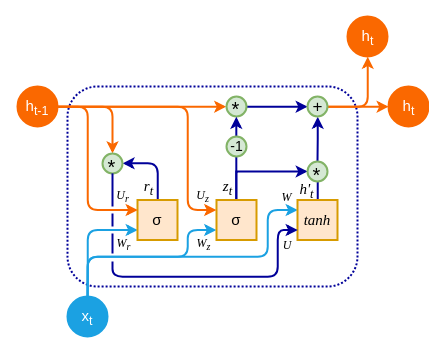

## c) Analyze the impact of “peephole connections” in LSTMs. How do they theoretically improve the LSTM’s ability to maintain its cell state? Include a discussion about the situations where peephole connections may not be beneficial.

Peephole connections are a modification to the standard LSTM architecture, introduced by Gers & Schmidhuber (2000). They allow the gate layers to access the cell state.

In a standard LSTM, the input, forget, and output gates determine how information flows into, out of, and within the cell. These gates use the current input and the previous hidden state to make their decisions. However, they do not have any direct interaction with the cell state.

Peephole connections change this by allowing the gates to 'peep' at the cell state. The cell state $$c_{t-1}$$ is included as an input to the input gate and the forget gate, and the cell state $$c_t$$ is included as an input to the output gate. This can be beneficial because it allows the gates to make decisions based on the actual cell state, not just the input and the previous hidden state.

Theoretically, peephole connections can improve the LSTM's ability to maintain its cell state by providing the gates with more relevant information. For example, if the cell state contains important information that should be preserved, the forget gate could 'see' this through the peephole connection and decide to keep the information in the cell state.

However, there are situations where peephole connections may not be beneficial:

1. **Increased Complexity**: Peephole connections increase the complexity of the LSTM model, which can make it harder to train. They also increase the number of parameters, which can lead to overfitting if not managed properly.

2. **Computational Cost**: The additional connections increase the computational cost of the LSTM, which could be a problem for large-scale applications or resource-constrained environments.

3. **Limited Improvement**: In some tasks, peephole connections may not lead to a significant improvement in performance. This could be the case if the task does not require the kind of long-term dependencies that peephole connections are designed to handle.

In conclusion, whether to use peephole connections or not depends on the specific task and the trade-off between computational cost and potential performance improvement. It's always a good idea to experiment with different architectures and see what works best for your specific use case.